# Accessing hard drive

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import shutil
from collections import defaultdict
import time
import json
from PIL import Image

In [2]:
data = "D:\\"

In [3]:
os.listdir(data)

['.Spotlight-V100',
 '.fseventsd',
 'System Volume Information',
 'Seagate',
 'ASL_Dataset1',
 '._\uf029',
 '.VolumeIcon.icns',
 '.VolumeIcon.ico',
 'Autorun.inf',
 '._ASL_Dataset1',
 'ASL_Dataset2',
 '._ASL_Dataset2',
 '$RECYCLE.BIN',
 'ASL_Dataset3',
 'SeaGate Starting Files',
 '._ASL_Dataset3',
 'APS360 Data',
 'Hagrid_Call']

In [4]:
def show_image(path):
    img = mpimg.imread(path)
    plt.imshow(img)
    return img

# Datasets

American Sign Lanauge 1: https://www.kaggle.com/datasets/kapillondhe/american-sign-language

American Sign Language 2: https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset

American Sign Language 3: https://www.kaggle.com/datasets/grassknoted/asl-alphabet 

HaGRID Gesture Detection: https://www.kaggle.com/datasets/kapitanov/hagrid 

ASL Finger Spelling Dataset: https://empslocal.ex.ac.uk/people/staff/np331/index.php?section=FingerSpellingDataset 

# Import Dataset 1-3

### Delete all non-JPG files

In [21]:
dir = "D:\\ASL_Dataset2\\asl_alphabet_train\\asl_alphabet_train"

In [27]:
def delete_corrupted_files(sub_directory):
    ls = os.listdir(sub_directory)
    filtered_list = [s for s in ls if s.startswith('.')]
    length = len(filtered_list)
    
    for corrupted_image in filtered_list:
        os.remove(sub_directory+"\\"+corrupted_image)
    print("Done!")

In [23]:
delete_corrupted_files(dir)

Done!


In [28]:
len(os.listdir(dir))

29

In [29]:
def clean_directory(directory):
    directories = os.listdir(directory)
    filtered_dir = [s for s in directories if not s.startswith('.')]
    for subdir in filtered_dir: 
        delete_corrupted_files(directory+"\\"+subdir)

In [30]:
# clean_directory(dir)

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


In [31]:
# clean_directory("D:\ASL_Dataset1\Test")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


In [32]:
# clean_directory("D:\ASL_Dataset1\Train")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


In [34]:
# clean_directory("D:\\ASL_Dataset3\\asl_alphabet_train")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


## Generate folders for A to Z, delete and space with 1000 classes per each

Some datasets such as American Sign Language Dataset 1 only have 1 person, whereas American Sign Language Dataset 3 has multiple people. So we need to apply a proportional split between the shared data to ensure there is diversity.

A-Z, space, delete - 80% dataset 3, 10% dataset 2, 10% dataset 1
OK - 100% dataset 4
Call - 100% dataset 4

In [52]:
# Write out directories
dataset1 = "D:\\ASL_Dataset1\\Train\\"
dataset2 = "D:\\ASL_Dataset2\\asl_alphabet_train\\asl_alphabet_train\\"
dataset3 = "D:\\\ASL_Dataset3\\asl_alphabet_train\\"
datasets = [dataset1,dataset2,dataset3]

In [76]:
# Splits for letters A-Z

diversity_split = [0.1,0.1,0.8]
dataset1_images_per_class = 2000*diversity_split[0]
dataset2_images_per_class = 2000*diversity_split[1]
dataset3_images_per_class = 2000*diversity_split[2]
split = [int(dataset1_images_per_class),int(dataset2_images_per_class),int(dataset3_images_per_class)]

In [74]:
print(dataset1_images_per_class)
print(dataset2_images_per_class)
print(dataset3_images_per_class)
print(split)

200.0
200.0
1600.0
[200.0, 200.0, 1600.0]


In [123]:
def choose_random_images(selected_dir,n):
    # print(selected_dir)
    folder_ls = os.listdir(selected_dir)
    length = len(folder_ls)
    indices = range(length)
    random_indices = random.sample(indices,n)
    filtered_ls = [selected_dir+"\\" + folder_ls[i] for i in random_indices]
    return filtered_ls

In [124]:
alphabet_classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
                   'O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [129]:
alphabet_file_dict = defaultdict(list)

for alphabet in alphabet_classes:
    s = time.time()
    for iteration, dataset in enumerate(datasets):
        folder_path = dataset + alphabet
        #print(folder_path)
        #print("Image number: " + str(split[iteration]))
        random_ls = choose_random_images(folder_path,split[iteration])
        alphabet_file_dict[alphabet] += random_ls
    e = time.time()
    print("Took alphabet " + alphabet + ": " + str(round(e-s,2)) + "seconds.")


Took alphabet A: 0.06seconds.
Took alphabet B: 0.05seconds.
Took alphabet C: 0.05seconds.
Took alphabet D: 0.05seconds.
Took alphabet E: 0.05seconds.
Took alphabet F: 0.05seconds.
Took alphabet G: 0.04seconds.
Took alphabet H: 0.03seconds.
Took alphabet I: 0.03seconds.
Took alphabet J: 0.04seconds.
Took alphabet K: 0.04seconds.
Took alphabet L: 0.06seconds.
Took alphabet M: 0.04seconds.
Took alphabet N: 0.03seconds.
Took alphabet O: 0.03seconds.
Took alphabet P: 0.03seconds.
Took alphabet Q: 0.04seconds.
Took alphabet R: 0.05seconds.
Took alphabet S: 0.05seconds.
Took alphabet T: 0.04seconds.
Took alphabet U: 0.03seconds.
Took alphabet V: 0.03seconds.
Took alphabet W: 0.03seconds.
Took alphabet X: 0.04seconds.
Took alphabet Y: 0.03seconds.
Took alphabet Z: 0.03seconds.


In [132]:
alphabet_store = "D:\\APS360 Data\\Initial_Data\\A_to_Z\\"
# print(alphabet_file_dict['A'])

(200, 200, 3)

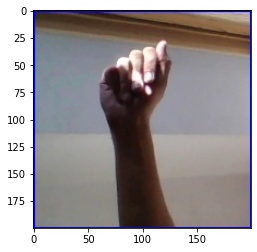

In [150]:
path = alphabet_file_dict['A'][1850]
show_image(path).shape

In [133]:
for alphabet in alphabet_classes:
    s = time.time()
    new_folder = alphabet_store+alphabet
    os.mkdir(new_folder)
    for image_path in alphabet_file_dict[alphabet]:
        shutil.copy(image_path,new_folder)
    e = time.time()
    print("Took alphabet " + alphabet + ": " + str(round(e-s,2)) + "seconds.")

Took alphabet A: 76.29seconds.
Took alphabet B: 87.03seconds.
Took alphabet C: 89.87seconds.
Took alphabet D: 86.74seconds.
Took alphabet E: 86.03seconds.
Took alphabet F: 90.24seconds.
Took alphabet G: 86.89seconds.
Took alphabet H: 86.09seconds.
Took alphabet I: 89.72seconds.
Took alphabet J: 87.22seconds.
Took alphabet K: 87.78seconds.
Took alphabet L: 88.31seconds.
Took alphabet M: 86.03seconds.
Took alphabet N: 84.88seconds.
Took alphabet O: 87.75seconds.
Took alphabet P: 84.71seconds.
Took alphabet Q: 88.49seconds.
Took alphabet R: 92.08seconds.
Took alphabet S: 83.44seconds.
Took alphabet T: 84.79seconds.
Took alphabet U: 89.42seconds.
Took alphabet V: 103.71seconds.
Took alphabet W: 87.54seconds.
Took alphabet X: 90.17seconds.
Took alphabet Y: 92.47seconds.
Took alphabet Z: 94.17seconds.


In [155]:
# For space we'll continue with the 10-10-80 split across the datasets
space_datasets = ["D:\\ASL_Dataset1\\Train\\Space","D:\\ASL_Dataset2\\asl_alphabet_train\\asl_alphabet_train\\space","D:\\ASL_Dataset3\\asl_alphabet_train\\space"]

# For delete we'll do a 0-20-80 split because dataset 1 doesn't have it
del_datasets = ["D:\\ASL_Dataset2\\asl_alphabet_train\\asl_alphabet_train\\del","D:\\ASL_Dataset3\\asl_alphabet_train\\del"]

In [158]:
space_file_list = []

s = time.time()
for iteration, dataset in enumerate(space_datasets):
    folder_path = dataset
    random_ls = choose_random_images(folder_path,split[iteration])
    space_file_list += random_ls
e = time.time()
print("Took space symbol: " + str(round(e-s,2)) + "seconds.")


Took space symbol: 0.05seconds.


In [160]:
len(space_file_list)

2000

In [161]:
symbol_store = "D:\APS360 Data\Initial_Data\space_delete"
s = time.time()
new_folder = symbol_store + "\\space"
os.mkdir(new_folder)
for image_path in space_file_list:
    shutil.copy(image_path,new_folder)
e = time.time()
print("Took space: " + str(round(e-s,2)) + "seconds.")

Took space: 74.49seconds.


In [164]:
split_del = [400,1600]
del_file_list = []

s = time.time()
for iteration, dataset in enumerate(del_datasets):
    folder_path = dataset
    random_ls = choose_random_images(folder_path,split_del[iteration])
    del_file_list += random_ls
    e = time.time()
    print("Took del symbol: " + str(round(e-s,2)) + "seconds.")

Took del symbol: 0.01seconds.
Took del symbol: 0.03seconds.


In [170]:
del_file_list[400]

'D:\\ASL_Dataset3\\asl_alphabet_train\\del\\del (724).jpg'

In [171]:
s = time.time()
new_folder = symbol_store + "\\del"
os.mkdir(new_folder)
for image_path in del_file_list:
    shutil.copy(image_path,new_folder)
e = time.time()
print("Took del: " + str(round(e-s,2)) + "seconds.")

Took del: 89.73seconds.


# Download and Process Non-Hagrid Symbols

In [1]:
call_dir = "D:\Hagrid_Call"

In [5]:
call_ls = [s for s in os.listdir(call_dir) if s.split(".")[1] != "zip"]

In [9]:
len(os.listdir(call_dir))

28194

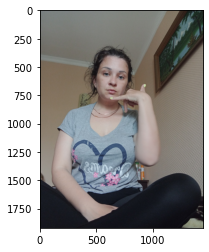

In [13]:
img = mpimg.imread(call_dir + "\\" + call_ls[0])
plt.imshow(img)

In [16]:
# Choose a random 3000 images
n = len(call_ls)
indices = range(n)
random_indices = random.sample(indices,3000)
print(random_indices)

[17553, 7698, 1877, 3237, 27371, 7317, 853, 5216, 11351, 1934, 27643, 18820, 10665, 26216, 355, 11481, 5844, 23808, 17959, 18887, 8758, 15855, 18445, 0, 25182, 24318, 10585, 28030, 20075, 1237, 24597, 5345, 5614, 17522, 8965, 18102, 5882, 1987, 7927, 7520, 14030, 3875, 19559, 27859, 16146, 8527, 963, 7137, 1160, 16354, 13802, 20097, 27976, 15084, 13418, 12761, 10915, 8674, 24153, 13221, 12608, 22687, 2584, 4522, 13288, 24334, 3110, 11129, 11087, 27520, 26355, 18878, 206, 11487, 5767, 20924, 15887, 23124, 5543, 10292, 1729, 21153, 3050, 9462, 15888, 1271, 14436, 13751, 13178, 13169, 2221, 10092, 4500, 4908, 6162, 15556, 8039, 9168, 22982, 26207, 10796, 26631, 1387, 21729, 12466, 7992, 5800, 5697, 25474, 9182, 9817, 7134, 24888, 5857, 5186, 24504, 17566, 26755, 4373, 20741, 976, 7882, 11502, 20430, 26634, 14842, 17440, 14775, 338, 21908, 17087, 27003, 10024, 26465, 1395, 19825, 9423, 20388, 15243, 1985, 17497, 11348, 11525, 17606, 27422, 294, 15866, 24424, 27666, 3215, 4698, 17204, 1372,

In [21]:
call_filtered = [call_ls[i] for i in random_indices]

In [23]:
call_filtered

['76537f62-546c-4d49-9ce5-691e4292ba17.jpg',
 'e8f6ef7c-0e47-4c16-befe-8d18a1a40e00.jpg',
 '33023d94-aa1c-4ca8-b035-208995985536.jpg',
 '5dc3d3d0-7c93-4fae-bef2-df8aed9d67f8.jpg',
 'f5ae0afa-1b70-45f9-a640-0fdb6b3b1741.jpg',
 'dd5fa50d-734e-4d01-a330-badb913542af.jpg',
 '1378b876-14f5-4437-befd-b049df95b445.jpg',
 '9c0c8cc3-dfb6-477d-a167-e89b3d47fa65.jpg',
 '25b716ee-61a4-4621-8b52-5359a37599f5.jpg',
 '352944e6-6f13-4c6f-9239-2a9bc6ffcabe.jpg',
 'f9107df1-674c-496f-80d1-bd7eb41ffc95.jpg',
 '86d9a451-ed0f-4c0a-9297-8d6e4fb88380.jpg',
 '1c8a407f-5c16-41ab-bade-5aa8de6b5679.jpg',
 'e74b7b5e-cf19-4b40-a79e-56c47b8e0742.jpg',
 '043d6112-4871-498a-9a58-caa590517eba.jpg',
 '275c8a54-2cfe-48fa-b795-bb224d3a1175.jpg',
 'ae717ce7-764a-4fb7-9c14-a41f05d604f2.jpg',
 'c764887f-3eb8-49c8-ade4-fbcb21a50e0f.jpg',
 '7badcef6-ef76-4246-8e9a-7825df7f6f4c.jpg',
 '87e41a28-f51c-4677-9eb9-7fee0bd48985.jpg',
 '040ce248-3094-4c61-88f6-938ee1d8f221.jpg',
 '60ca8ff7-5fc5-46a9-a300-f8192a7c5a7a.jpg',
 '81f34edc

In [26]:
# Copy images into a filtered folder
filtered_folder = "D:\\APS360 Data\\Initial_Data\\Hagrid_Call"
length = len(filtered_folder)
for count, image in enumerate(call_filtered):
    img_path = call_dir + "\\" + image
    shutil.copy(img_path,filtered_folder)
    if(count%5 == 0):
        print("Finished on count: " + str(count))

In [27]:
# Repeated same process above for OK symbol on a different computer 
# and downloaded it to hard-drive

In [28]:
filtered_call_dir = "D:\APS360 Data\Initial_Data\Hagrid_Call"

In [29]:
filtered_ok_dir = "D:\APS360 Data\Initial_Data\Hagrid_OK\OK\OK"

In [30]:
filtered_ok_ls = os.listdir(filtered_ok_dir)

In [31]:
filtered_ok_ls

['0015d9cc-28f6-4c40-a26a-d0d72eff5d32.jpg',
 '004fac40-47b8-4b32-b8a4-cb29c8d0946f.jpg',
 '0058bf3f-2503-4d47-85fb-2a6c15c93282.jpg',
 '006c18b9-f5a3-4f6d-b3ca-429e330960a8.jpg',
 '0084baa3-5896-4ac1-bedb-189853809742.jpg',
 '0089f3d7-6a04-4436-b8d0-454135e496ba.jpg',
 '008d09a2-1a80-446b-b757-cc108147398f.jpg',
 '009586c3-4124-42a8-8bed-0158fe3b070a.jpg',
 '009804bb-e39b-4ae4-a839-52e0acf46d17.jpg',
 '00d822f3-71c4-4811-b522-6a024296fa66.jpg',
 '00f28f29-5706-44fe-b550-975e999f9fe0.jpg',
 '00f63b7b-2fc3-404f-91d2-8c109f948468.jpg',
 '01141c7e-bb89-4273-a04c-773e6c32e754.jpg',
 '011499d7-1d42-4135-9bf3-b71d4a530fa8.jpg',
 '0169db65-ace8-4d91-805f-4ac38a3de9dc.jpg',
 '01711e1d-6941-45e9-94f0-9673d9432c87.jpg',
 '0179c9fb-2a7f-44ba-b513-ca22e80cb888.jpg',
 '017a8c9f-5214-421d-9565-ec0922228be8.jpg',
 '01a24cab-940e-4d3c-abdc-e38e21673321.jpg',
 '01ab047b-2820-44df-96d0-a9f7dcf35439.jpg',
 '01ad6143-f889-4d49-8e46-8ab34667993d.jpg',
 '01b364d7-d6a4-4119-b005-dd57ff8fc8ae.jpg',
 '01b5b575

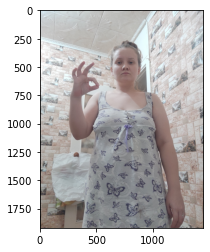

In [33]:
img = mpimg.imread(filtered_ok_dir + "\\" + filtered_ok_ls[0])
plt.imshow(img)

## Create bounding box crop function for Hagrid

In [2]:
hagrid_call = "D:\APS360 Data\Initial_Data\Hagrid_Call"
hagrid_ok = "D:\APS360 Data\Initial_Data\Hagrid_OK\OK\OK"

In [3]:
# Convert JSON files to dictionary
call_json = "D:\\APS360 Data\\Initial_Data\\ann_train_val\\call.json"
ok_json = "D:\\APS360 Data\\Initial_Data\\ann_train_val\\ok.json"

In [7]:
call_data = None
ok_data = None
with open(call_json,'r') as file:
    call_data = json.load(file)
with open(ok_json,'r') as file:
    ok_data = json.load(file)

In [41]:
sample_call = "D:\\APS360 Data\\Initial_Data\\Hagrid_Call\\0b97ea77-dbfa-4d1e-85a9-784cfacde77a.jpg"

In [42]:
show_image(sample_call)

array([[[29, 16,  8],
        [27, 14,  6],
        [23, 13,  4],
        ...,
        [48, 38, 11],
        [47, 40, 12],
        [46, 41, 12]],

       [[25, 12,  4],
        [24, 11,  3],
        [23, 13,  4],
        ...,
        [57, 45, 19],
        [47, 37, 10],
        [49, 42, 14]],

       [[27, 14,  6],
        [28, 15,  7],
        [27, 17,  8],
        ...,
        [57, 43, 17],
        [49, 37, 13],
        [55, 43, 19]],

       ...,

       [[24, 21, 16],
        [16, 13,  8],
        [13, 12,  7],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[23, 19, 16],
        [18, 14, 11],
        [15, 14,  9],
        ...,
        [ 5,  6,  8],
        [ 6,  6,  6],
        [ 8,  8,  8]],

       [[19, 15, 12],
        [19, 15, 12],
        [15, 14,  9],
        ...,
        [ 4,  5,  7],
        [ 2,  2,  2],
        [ 7,  7,  7]]], dtype=uint8)

In [43]:
filename = os.path.basename(sample_call)
bbox = call_data[filename.split(".")[0]]['bboxes']
#for box in bbox:
    #show_image(filename)[box[0]]

In [61]:
def crop_bounded_image(bbox, path):

    image = Image.open(path)

    for box in bbox:
        x = box[0] * image.width
        y = box[1] * image.height
        width = x + box[2] * image.width
        height = y + box[3] * image.height

        cropped_image = image.crop((x, y, width, height))
        #plt.imshow(cropped_image)
        #plt.show()
        return cropped_image
        #cropped_image.save(homedirectory + symbol + image_id + jpg)


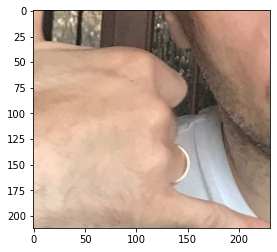

In [63]:
img = crop_bounded_image(bbox,sample_call)
plt.imshow(img)

In [54]:
type(img)

PIL.Image.Image

In [70]:
# Each image in this dataset is of a different person, so we can loop 
# through to generate 1000. We're only looking for images with one bounding 
# box.

call_cropped_dir = "D:\\APS360 Data\\Initial_Data\\hagrid_call_cropped"
call_dir = "D:\\APS360 Data\\Initial_Data\\Hagrid_Call"
call_ls = os.listdir(call_dir)

imgs_cropped = 0
i = 0
while (imgs_cropped < 2000):
    if(imgs_cropped % 10 == 0):
        print("Imgs cropped: " + str(imgs_cropped))
    filename = os.path.basename(call_ls[i])
    bbox = call_data[filename.split(".")[0]]['bboxes']
    if(len(bbox) > 1):
        i += 1
        continue
    else:
        img = crop_bounded_image(bbox,call_dir+"\\"+filename)
        #img.save(call_cropped_dir+"\\"+filename)
        i += 1
        imgs_cropped += 1

Imgs cropped: 0
Imgs cropped: 10
Imgs cropped: 10
Imgs cropped: 20
Imgs cropped: 30
Imgs cropped: 40
Imgs cropped: 50
Imgs cropped: 60
Imgs cropped: 60
Imgs cropped: 70
Imgs cropped: 70
Imgs cropped: 80
Imgs cropped: 90
Imgs cropped: 90
Imgs cropped: 90
Imgs cropped: 90
Imgs cropped: 100
Imgs cropped: 100
Imgs cropped: 110
Imgs cropped: 120
Imgs cropped: 130
Imgs cropped: 140
Imgs cropped: 140
Imgs cropped: 140
Imgs cropped: 150
Imgs cropped: 150
Imgs cropped: 160
Imgs cropped: 170
Imgs cropped: 180
Imgs cropped: 180
Imgs cropped: 190
Imgs cropped: 200
Imgs cropped: 210
Imgs cropped: 220
Imgs cropped: 230
Imgs cropped: 240
Imgs cropped: 240
Imgs cropped: 250
Imgs cropped: 260
Imgs cropped: 270
Imgs cropped: 280
Imgs cropped: 290
Imgs cropped: 300
Imgs cropped: 310
Imgs cropped: 320
Imgs cropped: 320
Imgs cropped: 330
Imgs cropped: 330
Imgs cropped: 340
Imgs cropped: 350
Imgs cropped: 350
Imgs cropped: 360
Imgs cropped: 360
Imgs cropped: 370
Imgs cropped: 380
Imgs cropped: 380
Imgs crop

0015d9cc-28f6-4c40-a26a-d0d72eff5d32.jpg
004fac40-47b8-4b32-b8a4-cb29c8d0946f.jpg
0058bf3f-2503-4d47-85fb-2a6c15c93282.jpg
Imgs cropped: 0
006c18b9-f5a3-4f6d-b3ca-429e330960a8.jpg
0084baa3-5896-4ac1-bedb-189853809742.jpg
0089f3d7-6a04-4436-b8d0-454135e496ba.jpg
008d09a2-1a80-446b-b757-cc108147398f.jpg
009586c3-4124-42a8-8bed-0158fe3b070a.jpg
009804bb-e39b-4ae4-a839-52e0acf46d17.jpg
00d822f3-71c4-4811-b522-6a024296fa66.jpg
00f28f29-5706-44fe-b550-975e999f9fe0.jpg
00f63b7b-2fc3-404f-91d2-8c109f948468.jpg
01141c7e-bb89-4273-a04c-773e6c32e754.jpg
011499d7-1d42-4135-9bf3-b71d4a530fa8.jpg
0169db65-ace8-4d91-805f-4ac38a3de9dc.jpg
01711e1d-6941-45e9-94f0-9673d9432c87.jpg
0179c9fb-2a7f-44ba-b513-ca22e80cb888.jpg
017a8c9f-5214-421d-9565-ec0922228be8.jpg
Imgs cropped: 10
01a24cab-940e-4d3c-abdc-e38e21673321.jpg
01ab047b-2820-44df-96d0-a9f7dcf35439.jpg
01ad6143-f889-4d49-8e46-8ab34667993d.jpg
01b364d7-d6a4-4119-b005-dd57ff8fc8ae.jpg
01b5b575-6582-435e-bb25-bf214eb17e31.jpg
01ead6f7-8cbd-49ec-b50f-

10d270b3-3e84-4277-9482-57fee4ea40a4.jpg
10d80547-7536-4fdf-b557-8b735e4bf67a.jpg
10dcf698-113b-4e47-8014-d1b4fb01a2f6.jpg
11057dd7-10a4-4180-9e6d-3713ae4992a8.jpg
111dc2b0-469d-4583-990b-78e34ffe8d40.jpg
1123ff47-fee3-4e24-9d2a-ae5aff3d5d98.jpg
118034d6-50bf-4c06-80f5-dcc9d568d0c8.jpg
11821220-2d3c-4e10-a1e9-aaf6796b42b5.jpg
Imgs cropped: 160
11905d57-0abe-4315-be7d-4bf9845271f3.jpg
1195ce54-a3d0-47bb-af7d-97daea15699e.jpg
11b28ff1-519e-4346-ba37-0c6cfb26dd78.jpg
11e83f4d-fc3c-4f7c-87ba-863cb8850a3a.jpg
11eca5cd-648c-4d40-835d-f2c545b86a36.jpg
11f12a14-2021-4f7a-97cd-fc338593b297.jpg
11ff86f8-44c0-4594-87dd-1ed74b60f8d4.jpg
120a0b3c-040c-404c-949d-951ba654a81a.jpg
1239cef9-5833-4a73-a381-6c2ac1745b37.jpg
12437557-3005-44ca-adc8-75135d8a865f.jpg
1249642a-0943-40bc-9bba-6ac4cfce8086.jpg
1262f0e4-6b75-4852-8c4c-499f39c543ae.jpg
12715f5a-8a4c-4e0b-a9b8-5616e5287d37.jpg
128bec2a-fb82-4cf9-aee6-fff8fc21e581.jpg
Imgs cropped: 170
129c92f4-9011-463c-96f7-e08a65898975.jpg
12c1c0cf-8456-4e9c-96

2361624b-5065-4e97-85f4-af5b9d035490.jpg
2368371c-ff2d-49a5-8545-bf785a0c4d25.jpg
23902798-d7eb-4e75-9860-26700b97b381.jpg
23954e4e-50e8-46c7-be87-74059b6f2adf.jpg
23c51602-98ce-41b4-bd85-a6e00f22c574.jpg
Imgs cropped: 310
23c5d5e7-045d-40b5-b1ce-952ff6700740.jpg
23c9ba87-4d10-4639-9bd5-a727a03e1082.jpg
23e2a02f-c9d8-4959-99b1-292138092929.jpg
2437e46d-30e6-4586-b123-c46c3a01119a.jpg
243e83e4-733c-46e5-ba0f-c3c361b3d070.jpg
243efebf-1bae-4496-be94-374c88b78eaf.jpg
245d6e50-2bab-4f1e-8ca6-b339d478aafb.jpg
24711ae1-baf6-4dca-92b2-de2a9903222e.jpg
2474018c-d7ca-40c9-a74c-b3f37498be12.jpg
24b3568f-44f9-4378-b00e-896761a92f63.jpg
24b59ccd-a414-4c1e-9845-d09ad1da2161.jpg
24c4debd-4e3c-45e0-937b-4c8e41051c6f.jpg
24e087bb-cb5c-4778-8e4d-ee2c793a933a.jpg
24e6b607-4892-4892-8e19-51953cc73780.jpg
Imgs cropped: 320
24e88950-ec03-4b8c-8ca5-1ec028eb7f66.jpg
25115bdb-0760-4dfc-b7d3-52502fac0294.jpg
2521dfb7-4e5b-497b-9df5-342c8084c93e.jpg
253e3a24-f1ac-4700-9a3c-9ccee2676b39.jpg
256b47cf-3106-4efa-8e

355b3b76-cfd6-4942-aab7-9713848a32ed.jpg
35612abe-ce64-461b-a343-a42de62f9e7b.jpg
35a11b9d-da82-434a-8144-c17ce2ac2461.jpg
35a40e64-23d0-48bf-9262-cbf2b98488b1.jpg
35cc97f9-5d7c-4fcb-9a69-610b1fffd67d.jpg
35d59227-fa55-4358-b6e5-1d2fa39e70a4.jpg
35d86e90-161a-4cf9-a669-398ba2258c23.jpg
35e62538-c167-442e-abe0-dfe3a88186f4.jpg
36031c9e-634f-457c-bee1-b02d0a5c69a8.jpg
362e166c-c27f-4b62-812b-336d53a022f7.jpg
3651fdbb-68aa-4a63-8a1d-c5be322bc04d.jpg
365abc61-453e-4fc4-b1db-9ac6d495c84a.jpg
Imgs cropped: 460
36765656-9b8c-4c79-bcc4-0d3e7e260997.jpg
368154d0-2a4e-48cf-abea-854ca929e6c2.jpg
368649c6-59ea-4612-816c-304741825645.jpg
36913c77-8636-427e-92ce-1dea2bbf5399.jpg
36b6bbc4-635e-4499-9778-864036b233e3.jpg
36cd6899-4633-473b-ab1a-4011bc0a633e.jpg
36d861a2-25a0-4640-87f8-37e9d7fe0844.jpg
36daffd5-f84c-4f54-ab1c-f1f96edb785b.jpg
36e1fa1a-8251-4729-adcb-44948459531a.jpg
36e86adf-0fbb-45dc-a2db-0f242f8f8aa2.jpg
36f3bca6-251a-4e26-8001-ef25a99978e8.jpg
3706437f-529c-4dbd-8504-a37f1e2b8eb6.jp

45ac618f-a301-41ca-8975-89d19ff6e05f.jpg
45b01a32-9292-496e-a7cc-3b8d31321895.jpg
Imgs cropped: 600
45b26068-3e07-43b0-ab3e-5232d0992889.jpg
45c3599b-ba6f-4c31-8130-eaebf5548e73.jpg
45c5ff4d-0919-4364-b83e-dd912c5464c0.jpg
45dc17e5-521c-472c-ac6d-3e0870b9e6c4.jpg
45dc7177-9f6f-4b74-92ff-36d03deec5ac.jpg
45e29637-c040-47dc-b09c-4ac57aaa42c8.jpg
461510a7-8130-4b76-b826-c88b17e3e8f3.jpg
461bfe22-fa5a-4b29-848f-f6d28170f810.jpg
461ece58-6bc0-4739-9ee0-b97e5dca7f3b.jpg
46306fc2-cdd2-485f-a835-d75325c61dd4.jpg
463b6178-bd2b-41d6-aafd-2b80dfb2181c.jpg
467804bd-b1f9-44dc-9a2e-70821d644dbb.jpg
46853830-0b9d-42a0-bbe7-067d37ac3ffa.jpg
46a652be-0eef-4fef-92a7-62b74da97e5c.jpg
46c00b17-65a0-4273-8f76-3bd4a1717788.jpg
Imgs cropped: 610
46d886b1-bb52-43c4-9b92-cd08e901d687.jpg
46fb154c-19fd-42d4-b123-2f60c977eb9d.jpg
47181c1e-cc0b-44dc-9916-b2fe315b8a70.jpg
471b032f-8118-4abd-9f34-9141a3fdcb7d.jpg
471e68c0-b746-4731-893c-6c656b75eff1.jpg
47211ce8-03a8-4e1f-8af4-d3e88492c3a0.jpg
4725aa13-a3b0-45d2-a5

Imgs cropped: 750
555fa12f-fcb1-4c46-8799-730b1ec89aca.jpg
55616817-7c47-4ff3-9d0e-5c20c658d491.jpg
5597fe3a-b004-4dd6-be68-21a67002c8c1.jpg
55bc90c2-3885-413c-b2d2-330e7e8f54ee.jpg
55bf7492-d0f0-4676-a38a-6277b44d7c40.jpg
55c51217-e9c8-4874-84bf-80ee72890c67.jpg
55c9f75b-bb35-4df4-9729-2f3729b91828.jpg
55d084c9-6170-4bcd-aa6a-18f6d2218a0f.jpg
55d4cb63-966f-444f-b442-38d8fb13e09f.jpg
55f998d6-9819-45fb-adf0-e9b49f601fe6.jpg
560dbe8f-1399-4fd0-a027-ff148b933f26.jpg
560ebc86-5357-4b50-91c8-3b025e65e5f3.jpg
562603fd-253e-48cc-937b-e65fde0a954e.jpg
562b6906-8abf-436b-a242-0f4754fd40b8.jpg
563e64c9-c3a2-4dbe-9c99-3d401068e1ca.jpg
5651c39b-3092-462c-bcce-49922c148b75.jpg
Imgs cropped: 760
5660d037-4d88-4cd8-a1ec-25087f2644a7.jpg
569b87f2-012f-4790-ac83-24d1cf62426c.jpg
56a14031-5033-4a10-bc2f-c024ecb9c660.jpg
56b81123-346a-470f-9498-8ec654c4be88.jpg
56f53bb8-03e8-4c94-9764-9fca7363f9c0.jpg
571eeff4-989e-4b37-9366-c25736738e21.jpg
57430783-755b-4af8-acb8-e28ad65aac0a.jpg
5746cb5b-ea85-4147-95

6704e706-dcdb-41d7-ba74-227384ea82d9.jpg
670a5044-68c4-4cb7-9047-a4c0550b9753.jpg
6714107b-61fe-4d74-b1af-b26c5bbee21f.jpg
67206652-a3f7-4a9d-b3e5-17d00faaeecd.jpg
6737f97b-ec6a-4c62-b244-e5d9fd11e5a0.jpg
675d8327-df0d-4786-ab46-20ce3fec8431.jpg
Imgs cropped: 900
676a20ab-ec20-483b-b639-ba645a22ac4e.jpg
67938fcb-776d-4e99-b727-9152644a2773.jpg
679f8cf9-cb94-4c25-8fa6-8b9b70a7ebeb.jpg
67a4ea38-ca4d-44c4-9ae4-30b0708ce645.jpg
67b4253b-98d2-40cb-bf02-ef9b95023b63.jpg
67b48301-1f76-4a4f-b258-d4444997341a.jpg
67b7b871-e002-4b16-818e-45e209dba917.jpg
67ee687f-5e2c-4421-a65e-4ccd4523f0bd.jpg
67f6e109-32ea-479b-a355-ff15b63ee43b.jpg
67fd4179-7901-4f12-a5b7-70fa62aec491.jpg
68059549-62f9-45f6-94d8-8e3ea95d5b20.jpg
Imgs cropped: 910
68238f37-55d0-49dc-9112-4c1b32eda966.jpg
68240530-49c0-46a9-b7d0-43b3b6ce90cb.jpg
683d35cd-2e02-43d2-a465-b558c7a604fd.jpg
688993a2-3452-4da4-b795-9540cbcd049e.jpg
689c9153-96ac-48ca-af24-0a3e0dad0fef.jpg
68aaeba0-0497-4952-8146-135bcb2f91e0.jpg
68c11a4b-2c5a-4cd7-9e

77998998-c046-401d-89b9-d3ab76209f80.jpg
77aa336a-0ae7-4d96-8c06-0c1c2e2ca387.jpg
77c1d6ba-89a9-47f2-9970-07d20787cc99.jpg
7813a8ff-ec5e-4c6d-bc03-96abd8f384bd.jpg
782758ff-eaea-4839-82e8-f49ba4da35c8.jpg
Imgs cropped: 1050
7828de76-44ad-4307-87cb-d1afb90faefc.jpg
7832b2a4-a7a2-4600-a394-7a8aaf66a9e3.jpg
78366a7b-95da-475e-ab8d-34d098b6458b.jpg
7837921f-04b1-46a3-ab24-8d5eeea78c82.jpg
7848af99-3fa7-4169-bb83-429162a19642.jpg
789a268a-7e9a-4a91-93ec-e4ce9ea82fdb.jpg
78a10c8c-ac39-49e6-bad1-df2815bd46e4.jpg
78ba4714-5458-4fbe-82c2-7fafa60969a1.jpg
78c1534a-fea6-4e37-9598-c030315e0414.jpg
78d87b90-4b2c-402c-8e4a-fd1c959d6334.jpg
78dc67f3-bc3a-4b46-bb52-1e517eb8fabc.jpg
78f3448c-8095-4bd3-8af0-7557d0a9dbf2.jpg
Imgs cropped: 1060
79073eb6-2508-46a7-a2eb-a8bebd2a5df4.jpg
79119ef2-b25f-442f-8b6f-9d22324ed0ee.jpg
792b1349-7767-45b6-b082-d81f342f2d48.jpg
79334940-227b-4f2f-9d4f-f3c57279d93a.jpg
79346d07-9f0a-4791-9b51-607fecd1c929.jpg
7939b1f1-d855-4b1c-92ca-0e5eb88b2e1c.jpg
793b605d-8483-449c-

Imgs cropped: 1200
863bc4a7-b52c-4171-ab24-7ee152899cf0.jpg
864eec2e-3918-4a5c-9243-df33dcc94648.jpg
865ca027-8081-4e91-abab-92f39b54013f.jpg
865ee1fc-768d-4447-ab10-e11543b56932.jpg
86623478-1574-4483-9e6e-3d82b6866547.jpg
868c465d-8a50-4958-8db3-67e6afa72d27.jpg
86b58b7d-c409-4fd1-8379-ac3c4a3bbefb.jpg
86bfb554-302a-44e2-9109-2e86cf4517b2.jpg
871cf931-ea20-4e4d-b06d-de75d35f992d.jpg
873165ea-b96c-4ab8-b122-e8eb49b850c6.jpg
873c0d0b-b185-44e3-80c9-e1a58ccbba8c.jpg
873d2cc6-f053-4a33-8ac6-5a5a195b5189.jpg
8766f0bf-2b63-45ba-b8a9-657756eca20c.jpg
8768a049-1fdf-4a04-88f7-8255dccdd80e.jpg
Imgs cropped: 1210
87b20ca1-2a17-41ed-b2d2-effccdf2946e.jpg
87bc9bd9-28b2-4e2d-a0b3-54d7616cdab0.jpg
87c33587-22c1-4175-b80b-f1eb86da6682.jpg
87f90ead-5f38-413b-86de-1856a66f4ba6.jpg
8824670e-9bf6-44e1-9b74-96e97be9c3bf.jpg
883fca9b-a4e5-42c3-88f9-d9bd7f96f01c.jpg
8867e857-2959-488a-8b85-db80001a8f2b.jpg
889292fe-aeba-4916-afac-6f909bf51101.jpg
88a8c795-f5e0-48da-baea-e4f91f9fb39c.jpg
88b7ca88-6540-47f7-

97275da4-4a5a-44bc-a9fb-8734f7b89ea0.jpg
9727793e-37bf-4b84-b882-c98fa519bf53.jpg
972ad8b2-fcf9-4d5b-a842-19c5f4e60774.jpg
974f8298-1999-413d-a47d-8efb0c978e75.jpg
97553e0f-32b0-4f77-87c5-936b7a5c9991.jpg
975a5374-243d-4262-9519-b056971cbd56.jpg
975b2aed-4d30-42f3-a702-c7af22fd12bb.jpg
97834e1f-6546-4802-bb93-f0b698d26973.jpg
97844d9d-1fa0-42c9-99ff-954fc4180cad.jpg
97a262bc-62d9-4285-9865-228ec28fcf29.jpg
97af6398-d66e-41f3-87f8-0f7bbe1984e4.jpg
Imgs cropped: 1360
97b49128-8b6c-448b-90af-64c635cd949e.jpg
97d748d4-8223-44c4-98bf-bd569b36798d.jpg
97eb190b-04d9-460d-abfb-e7db812d2457.jpg
97efcc38-83e1-4bfa-b5e0-799bb0f0848a.jpg
9852bf3d-cdd3-4225-b750-7c9300a0f101.jpg
987a62e8-f43a-4004-b774-1c12962eef39.jpg
988b3a5b-6abb-4668-9288-c652634edbc6.jpg
98ac9884-ff83-4ae1-b676-e145f62e3751.jpg
990b97d7-e58c-47c1-9226-60e5799f89c2.jpg
991a22d6-06a4-4f7a-8255-3fc3539aa365.jpg
991a7470-6552-4275-8426-623a89440856.jpg
992a21c2-016a-4697-b162-3e04932e4738.jpg
992bb6cc-f03b-47e5-8329-d39a7f94b101.j

a77ad7a6-92fb-46b7-a20d-be1d085ef4ed.jpg
a78a306c-0b6e-4502-aed1-c0a5888e8527.jpg
a790fbac-cd6d-4369-8a2f-56dfab15cf4b.jpg
Imgs cropped: 1510
a7c2be05-a447-4ed3-991a-aa4b2182145c.jpg
a7c6dcbe-aa62-4329-9538-25c48b706201.jpg
a7d2c642-6de9-4f11-99fb-f8f379830a84.jpg
a7f8911e-0d47-4ab2-bdf8-19a125c4e2bd.jpg
a801fbc8-bab9-4d1f-9f5a-3e9b7265aabc.jpg
a815868e-9b21-487a-9e46-a31fe48f0153.jpg
a8255d3e-c60a-4555-b1e1-7e25a093b87e.jpg
a849234b-c1ae-4fb9-aa61-02f6af915768.jpg
a85de485-2494-477c-b373-1f3dafbec4d8.jpg
a866bf97-1226-42c5-8f14-948fa17e01c3.jpg
a8741bcb-ffc3-46ff-899d-e93e5d471d21.jpg
a8bc7d4d-91ce-4983-9f5c-ccc338144383.jpg
a8d2a1ee-3e59-43dd-b8c6-8021ad009cbf.jpg
a9068920-d6b1-4526-a389-68cff36627b1.jpg
Imgs cropped: 1520
a9082a53-fdb8-4d3c-85e1-4c30dd0ad831.jpg
a91328ef-fa01-47e8-9215-8a596e5ed84f.jpg
a91654a3-9440-43a8-9a19-aeb00a35cff5.jpg
a916ec86-b1ae-423d-aefb-42d27b7e88cc.jpg
a91dc112-f924-4a74-8562-03bb5d4dd3ca.jpg
a9322cad-605d-4d1b-b9ff-7f4e5dcccdc5.jpg
a945d064-1fa7-4961-

b887ecda-e920-4ce1-9491-e745b1038f6a.jpg
b8a9d1c0-9bb8-4931-b9c7-35cea373ed6f.jpg
b8b78a12-4bc4-4878-b8b9-d3df8afbe63c.jpg
b8c3b0a4-7293-4f5a-8e66-ba39c69e1cc7.jpg
b8ce4c4e-f6a7-4c68-ac0b-b7b75967995c.jpg
b8eec057-6ba0-4684-9bee-bc7a245711de.jpg
b8f8d523-4f9d-4967-9cc6-28a633c59d87.jpg
b904a4de-f511-4924-b0b0-1d60b8739e2a.jpg
b9131ce5-1556-4619-8414-468fb8cbb7f3.jpg
Imgs cropped: 1660
b91d5c11-f364-4afd-b708-29ba1445e51e.jpg
b9251972-4e56-4a14-af43-f69f4a8b3a64.jpg
b959c6ed-7b8c-4fe2-987c-eaf06deb6f75.jpg
b98a69bf-fa6a-4d33-bed4-ecba6e5e8e1f.jpg
b9982a75-624e-4a2f-ae7e-c8fd79f30c75.jpg
b99c9d01-aad1-4a05-8b1c-66a85ed1cb38.jpg
b9b857ed-74b3-40be-af2d-f25fa06aa28b.jpg
b9db38b5-9a4e-4367-b040-9a6d344884c5.jpg
b9dfd93d-15a0-4a53-adab-1bd008c3bdbe.jpg
b9e32ef0-69c7-4b8a-8117-f8a3f4a03c2e.jpg
ba07e3d8-3ed4-49c2-84db-43f9729fbe6e.jpg
Imgs cropped: 1670
ba13255f-b7dd-4697-b474-07d2a73624ee.jpg
ba261e19-1c6c-483e-a126-3753ed8590e1.jpg
ba4468b2-56bb-464b-ae60-f09a26be098e.jpg
ba4af8b6-a61e-4e21-

c8442793-78de-4126-bc2d-eee1fedfb71c.jpg
Imgs cropped: 1810
c848b007-1da1-4b3e-ac2e-d8d7ad606691.jpg
c8a64b05-5a24-4682-b8cf-cefdb370af70.jpg
c8acd9df-2c34-4241-bffa-c598817a178b.jpg
c8ae368e-1e61-40e2-8e35-3472d319545f.jpg
c8b3b398-6301-453e-b9d1-4eb340ee9902.jpg
c8c45cb8-8004-4e89-9af8-a70ade21cabc.jpg
c8e585e2-7c47-4428-834c-90770ff227d7.jpg
c8f71b45-c4b3-431d-b985-25f672d1bf7e.jpg
c901dba9-383b-47fe-9256-dd95315b9487.jpg
c90d670c-910e-48c5-8f09-1af31de6f185.jpg
c928e69b-b72d-4c84-97b7-2a90c6fd0822.jpg
Imgs cropped: 1820
c930e1e1-dee8-4647-8e77-82d94f76f87f.jpg
c94064de-be40-40f7-bdf8-f2e6430e8963.jpg
c9669454-80f9-48a2-ac02-ee190075b5a1.jpg
c9a6add8-d6ed-49b4-9b7a-94feea0725fe.jpg
c9f0cdf1-d524-4d7b-bf5d-3051584ae683.jpg
c9f99f12-461d-411c-ac60-659535f926ae.jpg
ca01bb6b-87c2-4653-bed4-0a444a7eceba.jpg
ca1a886d-3841-4211-9e49-a6cdac482696.jpg
ca1f074b-e442-414a-b725-49b016ba959d.jpg
ca5b6370-35fe-4bab-aff0-c1c38bcd038a.jpg
ca614380-544f-4fe6-9716-4cc33cff5d1b.jpg
ca7ac84b-aeb0-4e33-

d99b4ffb-5f39-40e5-87f5-ca316d1db040.jpg
d9a048e0-db91-43e3-aba5-96fea5fff4fe.jpg
d9b06a78-5608-46c7-9a3f-c3bb3486dd94.jpg
d9e357ab-7d4e-410a-ab0e-09977c79bf2a.jpg
d9f745ed-ddec-4e18-b509-97cb8922fdc1.jpg
da02fdd5-4c8e-4afd-b6a0-5854da6d4d71.jpg
da146fb6-384a-467e-9f89-e79a9742984a.jpg
Imgs cropped: 1970
da240e9f-97c9-4e20-8069-c2497fba7d4c.jpg
da330ceb-c000-4cb4-8426-6df22759f27d.jpg
da423459-a3a9-41bc-8f75-35e205f078ba.jpg
da556348-4ab4-49eb-b705-0b38b1e83faa.jpg
da896c12-cb9e-40e0-87be-90298ea87079.jpg
daa267c4-6463-4166-b7f3-b33bf4b85b45.jpg
daa8e210-464c-4c86-aff9-225578441c89.jpg
dac5c621-8f68-4ea6-9ef3-37fe24cc3e30.jpg
dace83cc-d4b1-4e21-921f-71207846c36f.jpg
db272246-cc16-48f8-983e-919246e8d7c4.jpg
db4f0058-a883-42e4-b2c7-cb98308257bc.jpg
db54e02f-125b-45d3-9229-85d4e869d9da.jpg
db706b66-1e3a-4d65-b8c1-aeb3ca14fd23.jpg
Imgs cropped: 1980
db8766ee-7b1a-4917-9462-5cb3bf6e4fb4.jpg
db9e20eb-d1c4-41b5-ad56-48c0859abc82.jpg
dba75a52-e9db-45f1-ac1d-a82133a86eac.jpg
dbcc4e0d-f269-4d5d-

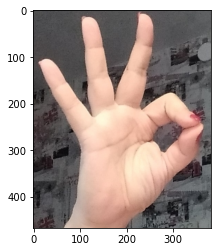

In [69]:

call_ok_dir = "D:\\APS360 Data\\Initial_Data\\hagrid_ok_cropped"
call_dir = "D:\\APS360 Data\\Initial_Data\\Hagrid_OK\\OK\\OK"
call_ls = os.listdir(call_dir)

imgs_cropped = 0
i = 0
while (imgs_cropped < 2000):
    filename = os.path.basename(call_ls[i])
    print(filename)
    bbox = ok_data[filename.split(".")[0]]['bboxes']
    if(len(bbox) > 1):
        i += 1
        continue
    else:
        img = crop_bounded_image(bbox,call_dir+"\\"+filename)
        if(imgs_cropped % 10 == 0):
            print("Imgs cropped: " + str(imgs_cropped))
            plt.imshow(img)
        img.save(call_cropped_dir+"\\"+filename)
        i += 1
        imgs_cropped += 1

## Hagrid Thumbs Up Filter 2000 Images

In [5]:
path = "D:\\Hagrid_Like.zip"

In [23]:
import random
import zipfile
from PIL import Image
import numpy as np
import time
import json
import os

In [19]:
with zipfile.ZipFile(path, 'r') as zip_ref:
    # Get a list of file names in the zip file
    file_names = zip_ref.namelist()
    
    # Randomly select 3000 file names
    random_files = random.sample(file_names, 3000)
    
    s = time.time()
    e = None
    
    for i, file_name in enumerate(random_files):
        batch = 40
        if(i%batch == 0):
            e = time.time()
            print("Batch " + str(i) + "/3000 time: " + str(round(e-s,2)))
            s = time.time()
        
        zip_ref.extract(file_name, "D:\\APS360 Data\\Initial_Data\\Hagrid_Thumbsup2")

Batch 0/3000 time: 0.0
Batch 40/3000 time: 4.62
Batch 80/3000 time: 4.57
Batch 120/3000 time: 4.27
Batch 160/3000 time: 4.54
Batch 200/3000 time: 4.26
Batch 240/3000 time: 4.9
Batch 280/3000 time: 4.68
Batch 320/3000 time: 5.01
Batch 360/3000 time: 4.75
Batch 400/3000 time: 4.96
Batch 440/3000 time: 4.9
Batch 480/3000 time: 5.36
Batch 520/3000 time: 4.86
Batch 560/3000 time: 5.17
Batch 600/3000 time: 4.42
Batch 640/3000 time: 5.31
Batch 680/3000 time: 5.16
Batch 720/3000 time: 5.26
Batch 760/3000 time: 5.01
Batch 800/3000 time: 4.8
Batch 840/3000 time: 4.96
Batch 880/3000 time: 4.93
Batch 920/3000 time: 4.94
Batch 960/3000 time: 4.93
Batch 1000/3000 time: 5.33
Batch 1040/3000 time: 4.79
Batch 1080/3000 time: 5.09
Batch 1120/3000 time: 4.74
Batch 1160/3000 time: 4.6
Batch 1200/3000 time: 4.89
Batch 1240/3000 time: 5.04
Batch 1280/3000 time: 4.66
Batch 1320/3000 time: 4.76
Batch 1360/3000 time: 5.57
Batch 1400/3000 time: 4.76
Batch 1440/3000 time: 5.33
Batch 1480/3000 time: 5.4
Batch 152

In [20]:
thumbsup_json = "D:\\APS360 Data\\Initial_Data\\ann_train_val\\like.json"
thumbsup_data = None
with open(thumbsup_json,'r') as file:
    thumbsup_data = json.load(file)

In [21]:
def crop_bounded_image(bbox, path):

    image = Image.open(path)

    for box in bbox:
        x = box[0] * image.width
        y = box[1] * image.height
        width = x + box[2] * image.width
        height = y + box[3] * image.height

        cropped_image = image.crop((x, y, width, height))
        return cropped_image

In [24]:
thumbsup_cropped_dir = "D:\\APS360 Data\\Initial_Data\\hagrid_thumbsup_cropped"
thumbsup_dir = "D:\\APS360 Data\\Initial_Data\\Hagrid_Thumbsup2"
thumbsup_ls = os.listdir(thumbsup_dir)

imgs_cropped = 0
i = 0
while (imgs_cropped < 2000):
    if(imgs_cropped % 10 == 0):
        print("Imgs cropped: " + str(imgs_cropped))
    filename = os.path.basename(thumbsup_ls[i])
    bbox = thumbsup_data[filename.split(".")[0]]['bboxes']
    if(len(bbox) > 1):
        i += 1
        continue
    else:
        img = crop_bounded_image(bbox,thumbsup_dir+"\\"+filename)
        img.save(thumbsup_cropped_dir+"\\"+filename)
        i += 1
        imgs_cropped += 1

Imgs cropped: 0
Imgs cropped: 10
Imgs cropped: 20
Imgs cropped: 30
Imgs cropped: 30
Imgs cropped: 30
Imgs cropped: 40
Imgs cropped: 50
Imgs cropped: 60
Imgs cropped: 70
Imgs cropped: 70
Imgs cropped: 80
Imgs cropped: 90
Imgs cropped: 100
Imgs cropped: 110
Imgs cropped: 110
Imgs cropped: 120
Imgs cropped: 120
Imgs cropped: 130
Imgs cropped: 140
Imgs cropped: 140
Imgs cropped: 140
Imgs cropped: 140
Imgs cropped: 140
Imgs cropped: 150
Imgs cropped: 150
Imgs cropped: 160
Imgs cropped: 170
Imgs cropped: 180
Imgs cropped: 190
Imgs cropped: 200
Imgs cropped: 200
Imgs cropped: 210
Imgs cropped: 220
Imgs cropped: 220
Imgs cropped: 230
Imgs cropped: 240
Imgs cropped: 250
Imgs cropped: 260
Imgs cropped: 270
Imgs cropped: 270
Imgs cropped: 270
Imgs cropped: 280
Imgs cropped: 290
Imgs cropped: 300
Imgs cropped: 300
Imgs cropped: 310
Imgs cropped: 310
Imgs cropped: 320
Imgs cropped: 330
Imgs cropped: 340
Imgs cropped: 350
Imgs cropped: 360
Imgs cropped: 360
Imgs cropped: 360
Imgs cropped: 370
Imgs c